<a href="https://colab.research.google.com/github/rishabhrawat526/Fast.ai_bear_classification/blob/main/bear_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jmd_imagescraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.2 MB/s eta 0:00:00


In [2]:
labels=['grizzly',"black","teddy"]
from jmd_imagescraper.core import * # dont't worry, it's designed to work with import *
from pathlib import Path
root = Path().cwd()/"images"

In [3]:
for i in labels:
  duckduckgo_search(root, "{}".format(i),"{}bear animal".format(i), max_results=20)




  



Duckduckgo search: grizzlybear animal


Duckduckgo search: blackbear animal


Duckduckgo search: teddybear animal


In [5]:
from jmd_imagescraper.imagecleaner import *

display_image_cleaner(root)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [6]:
from fastai.vision.all import *

In [7]:
fns = get_image_files(root)

In [8]:
fns

(#60) [Path('/content/images/teddy/008_2ed28ff6.jpg'),Path('/content/images/teddy/010_0f1f2b90.jpg'),Path('/content/images/teddy/014_6c7a923f.jpg'),Path('/content/images/teddy/004_c18d4695.jpg'),Path('/content/images/teddy/015_02669dfc.jpg'),Path('/content/images/teddy/006_6a138cc9.jpg'),Path('/content/images/teddy/005_29d78a3b.jpg'),Path('/content/images/teddy/019_481c0b10.jpg'),Path('/content/images/teddy/003_55c8ba5d.jpg'),Path('/content/images/teddy/002_3ea4d7ba.jpg')...]

In [9]:
failed=verify_images(fns)
failed

(#0) []

In [10]:
failed.map(Path.unlink) 
# for failed images


(#0) []

In [11]:
??verify_images

In [12]:
bears = DataBlock(
 blocks=(ImageBlock, CategoryBlock),
 get_items=get_image_files,
 splitter=RandomSplitter(valid_pct=0.2, seed=42),
 get_y=parent_label,
 item_tfms=Resize(128))

In [13]:
dls = bears.dataloaders(root,batch_size=10)

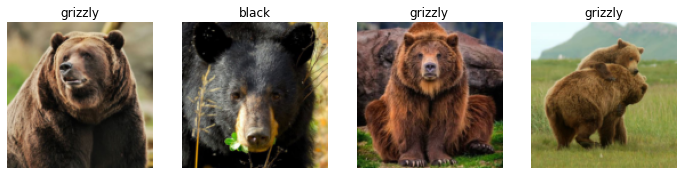

In [14]:
dls.valid.show_batch(max_n=4,nrows=1)

In [ ]:
# # bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
# # dls = bears.dataloaders(path)
# # dls.valid.show_batch(max_n=4, nrows=1)
# TO SQUISH/STRETCH  IMAGES

In [ ]:
# bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
# dls = bears.dataloaders(path)
# dls.valid.show_batch(max_n=4, nrows=1)
# TO ADD PADDING AROUND IMAGE

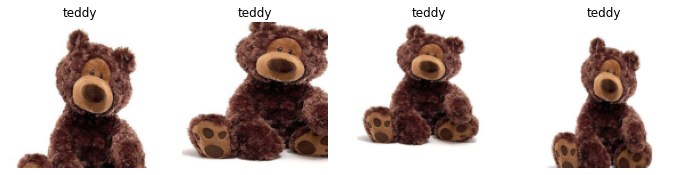

In [15]:
# randomresizedcrop speccifc example of dataaugumentation page 98
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(root,bs=10)
dls.train.show_batch(max_n=4, nrows=1, unique=True)


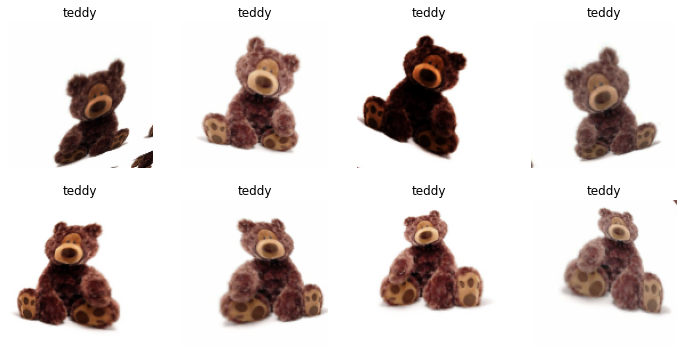

In [16]:
# using aug_transfroms for data auumentation
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(root,bs=10)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [17]:
bears = bears.new(
 item_tfms=RandomResizedCrop(224, min_scale=0.5),
 batch_tfms=aug_transforms())
dls = bears.dataloaders(root,bs=5)

In [18]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)


/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pt

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

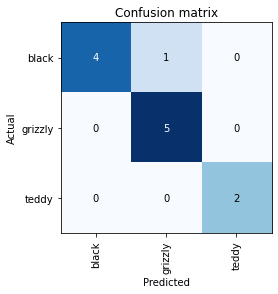

In [21]:
# to create confusion metrics
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

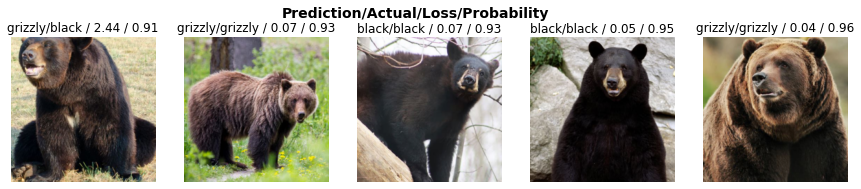

In [22]:
interp.plot_top_losses(5, nrows=1)


In [ ]:
# from fastai.vision.widgets import *
# cleaner = ImageClassifierCleaner(learn)
# cleaner


In [23]:
learn.export()

In [24]:
path = Path()
path.ls(file_exts=".pkl")

(#1) [Path('export.pkl')]

In [25]:
# When we use a model for getting predictions, instead of training, we call it inference.
# model has 2 part architectiure and training parameters ,,,so its safe to export both
learn_inf = load_learner(path/'export.pkl')

In [28]:
learn_inf.predict('images/black/001_cd344742.jpg')

('black', TensorBase(0), TensorBase([9.9819e-01, 1.7867e-03, 2.0544e-05]))

In [30]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [ ]:
# # The two things we need to make this gui in the notebooks are as follows:
# # • IPython widgets (ipywidgets)
# # • Voilà
# IPython widgets are GUI components that bring together JavaScript and Python func‐
# tionality in a web browser, and can be created and used within a Jupyter notebook.
# For instance, the image cleaner that we saw earlier in this chapter is entirely written
# with IPython widgets. However, we don’t want to require users of our application to
# run Jupyter themselves.
# That is why Voilà exists. It is a system for making applications consisting of IPython
# widgets available to end users, without them having to use Jupyter at all. Voilà is tak‐
# ing advantage of the fact that a notebook already is a kind of web application, just a
# rather complex one that depends on another web application: Jupyter itself. Essen‐
# tially, it helps us automatically convert the complex web application we’ve already
# implicitly made (the notebook) into a simpler, easier-to-deploy web application,
# which functions like a normal web application rather than like a notebook

In [32]:
import ipywidgets as widgets
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [34]:
img = PILImage.create(btn_upload.data[-1])


In [35]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [36]:
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9999')

In [37]:
btn_run = widgets.Button(description='Classify')
btn_run


Button(description='Classify', style=ButtonStyle())

In [38]:
def on_click_classify(change):
 img = PILImage.create(btn_upload.data[-1])
 out_pl.clear_output()
 with out_pl: display(img.to_thumb(128,128))
 pred,pred_idx,probs = learn_inf.predict(img)
 lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)

In [40]:
from ipywidgets import *
VBox([widgets.Label('Select your bear!'),
 btn_upload, btn_run, out_pl, lbl_pred])


# New Section